In [118]:
# importing required libraries
# Game One Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
merged_df = pd.read_csv('merged_data.csv')

In [120]:
merged_df.set_index('Rounds', inplace=True)
merged_df.replace('-', 1000, inplace=True)
merged_df = merged_df.apply(pd.to_numeric)
winners = merged_df.idxmin(axis=1)
w_merged_df = pd.DataFrame({'Winner': winners})
print(w_merged_df)

         Winner
Rounds         
1         Manav
2       Aaditya
3       Sushant
4       Sushant
5       Aaditya
6          Mith
7         Manav
8          Mith
9       Sushant
10       Gaurab
11      Sushant
12      Sushant
13        Manav
14      Aaditya
15        Manav
16       Gaurab
17       Gaurab
18      Aaditya
19      Aaditya
20      Aaditya
21      Aaditya
22       Gaurab
23       Gaurab
24      Sushant
25      Sushant
26      Aaditya
27      Aaditya
28       Gaurab
29        Manav
30      Aaditya
31       Gaurab


In [121]:
merged_df.head()

,Aaditya,Manav,Sushant,Gaurab,Mith
Rounds,,,,,
1,5,0,5,5,5
2,0,5,15,20,5
3,10,5,0,5,5
4,5,5,0,25,30
5,0,10,10,10,20


In [122]:
merged_df.describe()

,Aaditya,Manav,Sushant,Gaurab,Mith
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,11.129032,10.806452,12.096774,11.129032,587.419355
std,15.039375,13.668502,15.904622,14.300914,493.706848
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,5.000000,5.000000,10.000000
50%,5.000000,5.000000,5.000000,5.000000,1000.000000
75%,15.000000,10.000000,15.000000,15.000000,1000.000000
max,45.000000,65.000000,80.000000,60.000000,1000.000000


<Axes: ylabel='Rounds'>

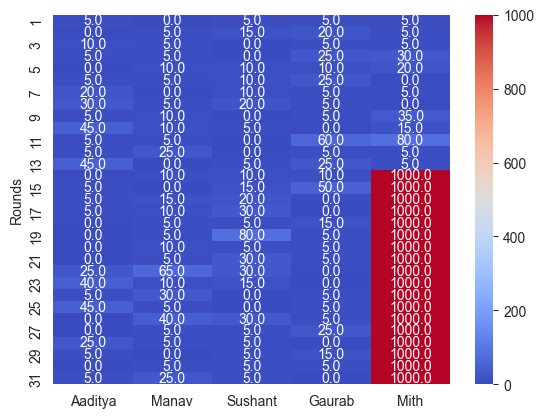

In [123]:
pivot_data = merged_df
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt=".1f")

In [124]:
print(merged_df)

        Aaditya  Manav  Sushant  Gaurab  Mith
Rounds                                       
1             5      0        5       5     5
2             0      5       15      20     5
3            10      5        0       5     5
4             5      5        0      25    30
5             0     10       10      10    20
6             5      5       10      25     0
7            20      0       10       5     5
8            30      5       20       5     0
9             5     10        0       5    35
10           45     10        5       0    15
11            5      5        0      60    80
12            5     25        0       5     5
13           45      0        5      25     5
14            0     10       10      10  1000
15            5      0       15      50  1000
16            5     15       20       0  1000
17            5     10       30       0  1000
18            0      5        5      15  1000
19            0      5       80       5  1000
20            0     10        5   

In [125]:
results = []

for index, row in merged_df.iterrows():
    filtered_row = row[row != 1000]
    if not filtered_row.empty:
        min_score = filtered_row.min()
        winners = filtered_row[filtered_row == min_score].index.tolist()

        for winner in winners:
            results.append({'Round': index, 'Total': filtered_row.sum(), 'Winner': winner})

winner_df = pd.DataFrame(results)

winner_df.set_index('Round', inplace=True)

print(winner_df)

       Total   Winner
Round                
1         20    Manav
2         45  Aaditya
3         25  Sushant
4         65  Sushant
5         50  Aaditya
6         45     Mith
7         40    Manav
8         60     Mith
9         55  Sushant
10        75   Gaurab
11       150  Sushant
12        40  Sushant
13        80    Manav
14        30  Aaditya
15        70    Manav
16        40   Gaurab
17        45   Gaurab
18        25  Aaditya
19        90  Aaditya
20        20  Aaditya
21        40  Aaditya
22       120   Gaurab
23        65   Gaurab
24        40  Sushant
25        55  Sushant
26        75  Aaditya
27        35  Aaditya
28        35   Gaurab
29        25    Manav
30        15  Aaditya
31        35   Gaurab


In [126]:
win_counts = winner_df['Winner'].value_counts()
print(win_counts)

Winner
Aaditya    10
Sushant     7
Gaurab      7
Manav       5
Mith        2
Name: count, dtype: int64


In [127]:
for index, row in merged_df.iterrows():
    filtered_row = row[row != 1000]

    sum_row = filtered_row.sum()  # Calculating the sum of the row values
    winners = [col for col, val in filtered_row.items() if val == 0]
    num_winners = len(winners)
    
    if sum_row != 0 and num_winners > 0:
        debt_per_winner = sum_row / num_winners
        for winner in winners:
            print(f"At Round: {index}, {winner} is owed: {debt_per_winner}")


At Round: 1, Manav is owed: 20.0
At Round: 2, Aaditya is owed: 45.0
At Round: 3, Sushant is owed: 25.0
At Round: 4, Sushant is owed: 65.0
At Round: 5, Aaditya is owed: 50.0
At Round: 6, Mith is owed: 45.0
At Round: 7, Manav is owed: 40.0
At Round: 8, Mith is owed: 60.0
At Round: 9, Sushant is owed: 55.0
At Round: 10, Gaurab is owed: 75.0
At Round: 11, Sushant is owed: 150.0
At Round: 12, Sushant is owed: 40.0
At Round: 13, Manav is owed: 80.0
At Round: 14, Aaditya is owed: 30.0
At Round: 15, Manav is owed: 70.0
At Round: 16, Gaurab is owed: 40.0
At Round: 17, Gaurab is owed: 45.0
At Round: 18, Aaditya is owed: 25.0
At Round: 19, Aaditya is owed: 90.0
At Round: 20, Aaditya is owed: 20.0
At Round: 21, Aaditya is owed: 40.0
At Round: 22, Gaurab is owed: 120.0
At Round: 23, Gaurab is owed: 65.0
At Round: 24, Sushant is owed: 40.0
At Round: 25, Sushant is owed: 55.0
At Round: 26, Aaditya is owed: 75.0
At Round: 27, Aaditya is owed: 35.0
At Round: 28, Gaurab is owed: 35.0
At Round: 29, Manav

In [128]:
for index, row in merged_df.iterrows():
    filtered_row = row[row != 1000]

    sum_row = filtered_row.sum()  # Calculating the sum of the row values
    winners = [col for col, val in filtered_row.items() if val == 0]
    num_winners = len(winners)

    if sum_row != 0 and num_winners > 0:
        debt_per_winner = sum_row / num_winners
        for winner in winners:
            print(f"At Round: {index}, {winner} is owed: {debt_per_winner}")

winners_owed = {}

for index, row in merged_df.iterrows():
    filtered_row = row[row != 1000]

    sum_row = filtered_row.sum()  # Calculating the sum of the row values
    winners = [col for col, val in filtered_row.items() if val == 0]
    num_winners = len(winners)

    if sum_row != 0 and num_winners > 0:
        debt_per_winner = sum_row / num_winners
        for winner in winners:
            if winner not in winners_owed:
                winners_owed[winner] = 0
            winners_owed[winner] += debt_per_winner

for winner, amount in winners_owed.items():
    print(f"{winner}: {amount}")


At Round: 1, Manav is owed: 20.0
At Round: 2, Aaditya is owed: 45.0
At Round: 3, Sushant is owed: 25.0
At Round: 4, Sushant is owed: 65.0
At Round: 5, Aaditya is owed: 50.0
At Round: 6, Mith is owed: 45.0
At Round: 7, Manav is owed: 40.0
At Round: 8, Mith is owed: 60.0
At Round: 9, Sushant is owed: 55.0
At Round: 10, Gaurab is owed: 75.0
At Round: 11, Sushant is owed: 150.0
At Round: 12, Sushant is owed: 40.0
At Round: 13, Manav is owed: 80.0
At Round: 14, Aaditya is owed: 30.0
At Round: 15, Manav is owed: 70.0
At Round: 16, Gaurab is owed: 40.0
At Round: 17, Gaurab is owed: 45.0
At Round: 18, Aaditya is owed: 25.0
At Round: 19, Aaditya is owed: 90.0
At Round: 20, Aaditya is owed: 20.0
At Round: 21, Aaditya is owed: 40.0
At Round: 22, Gaurab is owed: 120.0
At Round: 23, Gaurab is owed: 65.0
At Round: 24, Sushant is owed: 40.0
At Round: 25, Sushant is owed: 55.0
At Round: 26, Aaditya is owed: 75.0
At Round: 27, Aaditya is owed: 35.0
At Round: 28, Gaurab is owed: 35.0
At Round: 29, Manav

In [130]:
sum_owed = {player1: {player2: 0 for player2 in merged_df.columns if player2 != player1} for player1 in merged_df.columns}

for player1, col1 in merged_df.items():
    for player2, col2 in merged_df.items():
        if player1 != player2:
            for score1, score2 in zip(col1, col2):
                # Skip the round if either player did not participate
                if score1 != 1000 and score2 != 1000:
                    if score1 > score2:
                        sum_owed[player1][player2] += score1 - score2

output = []

for player1, debts in sum_owed.items():
    for player2, amount in debts.items():
        if amount > 0:
            output.append(f"{player1} owes {amount} to {player2}")

# output
for item in output:
    print(item)


Aaditya owes 235 to Manav
Aaditya owes 225 to Sushant
Aaditya owes 255 to Gaurab
Aaditya owes 125 to Mith
Manav owes 225 to Aaditya
Manav owes 160 to Sushant
Manav owes 230 to Gaurab
Manav owes 30 to Mith
Sushant owes 255 to Aaditya
Sushant owes 200 to Manav
Sushant owes 255 to Gaurab
Sushant owes 45 to Mith
Gaurab owes 255 to Aaditya
Gaurab owes 240 to Manav
Gaurab owes 225 to Sushant
Gaurab owes 65 to Mith
Mith owes 155 to Aaditya
Mith owes 155 to Manav
Mith owes 175 to Sushant
Mith owes 80 to Gaurab


In [131]:
# Initializing empty lists for new DataFrame columns
debtor = []
amount = []
creditor = []

for line in output:
    parts = line.split()
    debtor.append(parts[0])
    amount.append(int(parts[2]))  
    creditor.append(parts[4]) 

new_df = pd.DataFrame({'Debtor': debtor, 'Amount': amount, 'Creditor': creditor})

# Display the new DataFrame
print(new_df)

     Debtor  Amount Creditor
0   Aaditya     235    Manav
1   Aaditya     225  Sushant
2   Aaditya     255   Gaurab
3   Aaditya     125     Mith
4     Manav     225  Aaditya
5     Manav     160  Sushant
6     Manav     230   Gaurab
7     Manav      30     Mith
8   Sushant     255  Aaditya
9   Sushant     200    Manav
10  Sushant     255   Gaurab
11  Sushant      45     Mith
12   Gaurab     255  Aaditya
13   Gaurab     240    Manav
14   Gaurab     225  Sushant
15   Gaurab      65     Mith
16     Mith     155  Aaditya
17     Mith     155    Manav
18     Mith     175  Sushant
19     Mith      80   Gaurab


In [132]:
# Initialize a dictionary to store adjustments
adjustments = {}

# Iterate over the DataFrame to identify adjustments
for index, row in new_df.iterrows():
    debtor = row['Debtor']
    amount = row['Amount']
    creditor = row['Creditor']

    # Check if the reverse debt (creditor as debtor and vice versa) exists
    reverse_key = (creditor, debtor)
    current_key = (debtor, creditor) 
    if reverse_key in adjustments:
        # Calculate the net amount after adjustment
        net_amount = amount - adjustments[reverse_key]

        if net_amount > 0:
            adjustments[current_key] = net_amount
            adjustments[reverse_key] = 0
        else:
            adjustments[reverse_key] -= amount
            adjustments[current_key] = 0
    else:
        # If no reverse debt, add the current debt to adjustments
        adjustments[current_key] = amount

# Apply the adjustments to the DataFrame
for (debtor, creditor), amount in adjustments.items():
    new_df.loc[(new_df['Debtor'] == debtor) & (new_df['Creditor'] == creditor), 'Amount'] = amount

# Remove rows with zero amount (fully adjusted debts)
new_df = new_df[new_df['Amount'] > 0]

# Print the final result
print(new_df)

     Debtor  Amount Creditor
0   Aaditya      10    Manav
8   Sushant      30  Aaditya
9   Sushant      40    Manav
10  Sushant      30   Gaurab
13   Gaurab      10    Manav
16     Mith      30  Aaditya
17     Mith     125    Manav
18     Mith     130  Sushant
19     Mith      15   Gaurab
